In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
train = pd.read_csv(r'C:/Users/12239/Desktop/CFF/离散制造过程中典型工件的质量符合率预测/train_set/first_round_training_data - 副本.csv')
test = pd.read_csv(r'C:\Users\12239\Desktop\CFF\离散制造过程中典型工件的质量符合率预测\test_set\first_round_testing_data - 副本.csv')

In [3]:
attribute_name = ['Attribute{0}'.format(i) for i in range(1,11)]#选取特征
for attr in attribute_name:
    train[attr] = np.log10(train[attr])

In [4]:
parameter_name = ['Parameter{0}'.format(i) for i in range(1,11)]#选取特征
for para in parameter_name:
    train[para] = np.log10(train[para])
    test[para] = np.log10(test[para])

In [7]:
px.scatter(test, x="Parameter1", y="Parameter2",marginal_y="box", marginal_x="box", trendline="ols")

In [8]:
px.scatter_3d(train,x='Attribute4',y='Attribute5',z='Attribute6',color='Quality_label',opacity=0.7)

In [5]:
pca1=PCA(n_components=2)
pca2=PCA(n_components=2)
pca1.fit(train[parameter_name])
pca2.fit(test[parameter_name])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
feature_name = ['Parameter{0}'.format(i) for i in range(5,11)]
pca3=PCA(n_components=2)
pca4=PCA(n_components=2)
pca3.fit(train[feature_name])
pca4.fit(test[feature_name])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, 'PCA(Parameter1-Parameter10 on trainset)')

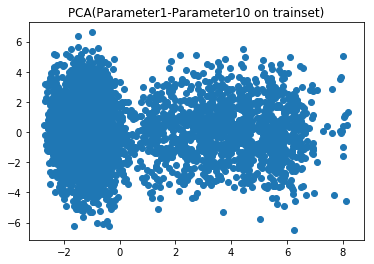

In [11]:
data1 = pca1.transform(train[parameter_name])
plt.scatter(data1[:,0],data1[:,1])
plt.title('PCA(Parameter1-Parameter10 on trainset)')

Text(0.5, 1.0, 'PCA(Parameter1-Parameter10 on testset)')

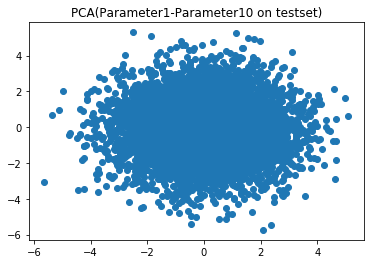

In [12]:
data2 = pca2.transform(train[parameter_name])
plt.scatter(data2[:,0],data2[:,1])
plt.title('PCA(Parameter1-Parameter10 on testset)')

Text(0.5, 1.0, 'PCA(Parameter5-Parameter10 on trainset)')

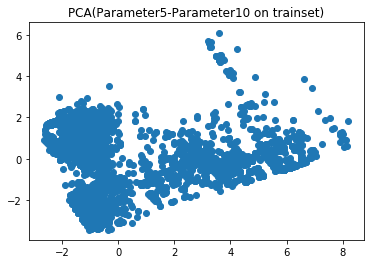

In [7]:
data3 = pca3.transform(train[feature_name])
plt.scatter(data3[:,0],data3[:,1])
plt.title('PCA(Parameter5-Parameter10 on trainset)')

Text(0.5, 1.0, 'PCA(Parameter5-Parameter10 on testset)')

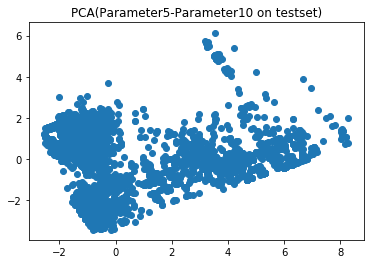

In [8]:
data4 = pca4.transform(train[feature_name])
plt.scatter(data4[:,0],data4[:,1])
plt.title('PCA(Parameter5-Parameter10 on testset)')

In [5]:
pca1=PCA(n_components=3)
pca2=PCA(n_components=3)
pca1.fit(train[parameter_name])
pca2.fit(test[parameter_name])
feature_name = ['Parameter{0}'.format(i) for i in range(5,11)]
pca3=PCA(n_components=3)
pca4=PCA(n_components=3)
pca3.fit(train[feature_name])
pca4.fit(test[feature_name])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
data1 = pca2.transform(test[parameter_name])
plt.scatter3D(data1[:,0],data1[:,1],data1[:,2])
plt.title('PCA(Parameter1-Parameter10 on trainset)')

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatter3D'

In [23]:
data1 = pca4.transform(test[feature_name])

In [13]:
data1[:,2]

array([ 2.59171216,  0.42226101,  0.57633449, ..., -2.19048167,
       -0.91125061, -1.73323187])

Text(0.5, 0.92, 'PCA(Parameter5-Parameter10 on testset)')

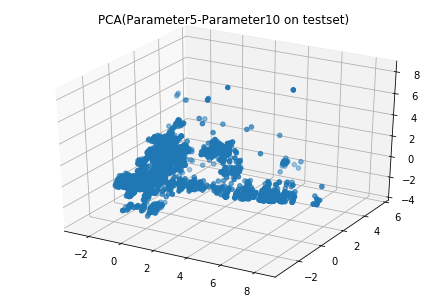

In [24]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
 
# 将二维转化为三维
axes3d = Axes3D(fig)
 
# axes3d.scatter3D(x,y,z)
# 效果相同
axes3d.scatter(data1[:,0],data1[:,1],data1[:,2])
plt.title('PCA(Parameter5-Parameter10 on testset)')